In [1]:
%matplotlib qt

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing
from networkx.readwrite import json_graph

In [46]:
def read_json_file(filename):
    with open(filename,  "r", encoding="utf8") as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph, directed=False, multigraph=True)

In [47]:
G = read_json_file("MC3/MC3.json")

In [48]:
G.is_directed(), G.is_multigraph()

(True, True)

In [49]:
G = G.to_undirected()

In [50]:
G.is_directed(), G.is_multigraph()

(False, True)

In [51]:
G.number_of_edges(), G.number_of_nodes()

(24038, 52170)

### ISSUE #1

In [10]:
with open("MC3/MC3.json", "r", encoding="utf8") as f:
    data = json.load(f)

# Create a NetworkX graph
G = nx.MultiGraph()

# Add nodes to the graph
for i, node in enumerate(data['nodes']):
    node_id = node['id'][0]
    country = node['country'][0]
    #product_services = node["product_services"][0]
    #revenue_omu = node["revenue_omu"][0]
    G.add_node(node_id, ntype=node["type"][0])

    
# Add edges to the graph
for edge in data['links']:
    source = edge['source'][0]
    target = edge['target'][0]
    G.add_edge(source,target)

In [11]:
G.is_directed(),G.is_multigraph()

(False, True)

In [12]:
G.is_directed(),G.is_multigraph()
G.is_directed(),G.is_multigraph()

(False, True)

In [13]:
G.number_of_edges(), G.number_of_nodes()

(24038, 51375)

In [14]:
nx.number_connected_components(G)

27384

In [15]:
len(data["nodes"])

27622

#### another way to load file using only links info

In [16]:
edges2 = list(map(lambda x: (x["source"][0], x["target"][0]), data["links"]))

In [17]:
G = nx.MultiGraph(edges2)

In [18]:
G.number_of_edges(), G.number_of_nodes()

(24038, 34062)

In [19]:
nx.number_connected_components(G)

10071

In [19]:
count = 0
for node in data["nodes"]:
    node = node["id"][0]
    try:
        nx.node_connected_component(G, node)
        count+=1
    except KeyError:
        pass

In [20]:
connected_components = [c for c in sorted(nx.connected_components(G), key=len, reverse=False)]

In [22]:
#len(list(filter(lambda x: len(x)>2, connected_components)))

#### Para ver que hay nodos duplicados

In [30]:
def safe_convert(x):
    try:
        return x[0]
    except:
        return ""

In [31]:
df = pd.DataFrame(data["nodes"])

df.id = df.id.apply(lambda x:x[0])
df.country = df.country.apply(lambda x:x[0])
df.product_services = df.product_services.apply(safe_convert)
df.revenue_omu = df.revenue_omu.apply(safe_convert)
df.role = df.role.apply(safe_convert)
df.type = df.type.apply(lambda x:x[0])

AttributeError: 'DataFrame' object has no attribute 'role'

In [23]:
nodes = df.id.values.tolist()

In [24]:
len(nodes), len(set(nodes))#counting without duplicate

(27622, 22929)

In [25]:
df1 = pd.DataFrame(data["links"])

df1.source = df1.source.apply(lambda x: x[0])
df1.target = df1.target.apply(lambda x: x[0])
df1.type = df1.type.apply(lambda x: x[0])

In [26]:
##all nodes from source and target
nodes_edges = df1.source.values.tolist() + df1.target.values.tolist()

In [27]:
len(nodes_edges), len(set(nodes_edges))#counting without duplicate

(48076, 34062)

In [153]:
#how many nodes defined by links are not in the nodes section
count = 0
for i in set(nodes_edges):
    if i not in nodes:
        count+=1

In [154]:
"#nodes defined by the links specified in the nodes section:{}".format(len(set(nodes_edges)) - count)

'#nodes defined by the links specified in the nodes section:5616'

In [155]:
"#nodes defined by the links not specified in the nodes section:{}".format(count)

'#nodes defined by the links not specified in the nodes section:28446'

In [156]:
count = 0
for j in set(nodes):
    if j in nodes_edges:
        count+=1

In [157]:
count

5616

In [158]:
"#nodes that are in the links section.:{}".format(count)

'#nodes that are in the links section.:5616'

In [159]:
"#nodes that are not in the links section.:{}".format(len(set(nodes))-count)

'#nodes that are not in the links section.:17313'

### ISSUE #2

In [32]:
fnodes = df[df.id=="Smith LLC"]

In [33]:
fnodes

,country,id,product_services,revenue_omu,type
336,ZH,Smith LLC,Battery chargers and power supplies,404431.3938,Company
1431,ZH,Smith LLC,Unknown,50258.3155,Company
2596,ZH,Smith LLC,Jelly glues,20068.1025,Company
6009,ZH,Smith LLC,Unknown,4671.5,Company
6241,ZH,Smith LLC,Unknown,Unknown,Company
6813,ZH,Smith LLC,Unknown,Unknown,Company
8991,ZH,Smith LLC,,,Beneficial Owner
9428,ZH,Smith LLC,,,Beneficial Owner
9996,ZH,Smith LLC,,,Beneficial Owner
10544,ZH,Smith LLC,,,Beneficial Owner


In [34]:
fedges = df1[(df1.source=="Smith LLC") | (df1.target=="Smith LLC")]

In [35]:
fedges

,source,target,type
5014,Smith LLC,Michelle Tucker PhD,Beneficial Owner
5872,Smith LLC,Christine Roberts,Beneficial Owner
6183,Smith LLC,Kristen Villa,Beneficial Owner
9583,Smith LLC,Timothy Cox,Beneficial Owner
11068,Smith LLC,Susan Underwood,Company Contacts
12452,Smith LLC,Tamara Taylor,Company Contacts
13618,Smith LLC,Natasha Rodriguez,Beneficial Owner
18069,Smith LLC,Barbara Guzman,Beneficial Owner
18241,Smith LLC,Danny Stewart,Beneficial Owner
19470,Smith LLC,Michelle Murray,Beneficial Owner


In [36]:
G = nx.MultiGraph()

for i, node in enumerate(fnodes.values):
    node_id = node[1]
    G.add_node(node_id, serial=i, revenue=node[3], type1=node[4])

for edge in fedges.values:
    source = edge[0]
    target = edge[1]
    G.add_edge(source,target)

In [37]:
%matplotlib inline

In [38]:
G.number_of_edges(), G.number_of_nodes()

(13, 14)

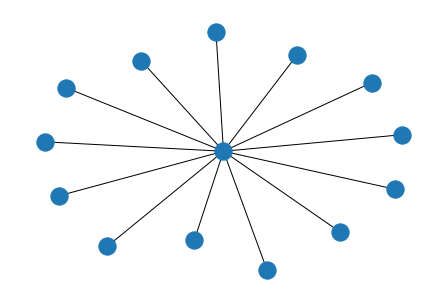

In [40]:
nx.draw(G)

In [152]:
G.nodes.data()

NodeDataView({'Miller Group': {'serial': 15, 'revenue': nan, 'type1': ['Company Contacts']}, 'Steven Austin': {}, 'Melanie Williamson': {}, 'Laura Williams': {}, 'Jason Welch': {}, 'Kaitlyn Hurst': {}, 'Louis Harmon': {}})

In [66]:
for s in (set(nodes) - set(nodes_edges)):
    if s in nodes_edges:
        print(s)


KeyboardInterrupt: 